In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 5日間1h

### 分解能、期間数プロット(時間)

In [153]:
from sympy import *
x=Symbol('x')    # 文字'x'を変数xとして定義
y=Symbol('y')    # 文字'x'を変数xとして定義

"""
方程式: solve
連立方程式 x**2+y**2=4, y=2x+1の解を求める
"""
t= solve ([x*(8760**y)-719, x*(120**y)-1],[x,y])  # 連立方程式を解く
print(t)

[(120**(-log(719)/log(73)), log(719)/log(73))]


In [154]:
x1 = np.float(-log(719))
x2 = np.float(log(73))

y1 = np.float(log(719))
y2 = np.float(log(73))

In [155]:
xx = 120**(x1/x2)
yy = y1/y2

In [156]:
def sigmoid(a):    
    u = xx*(a**yy)+1
    return u

In [157]:
x = np.arange(0,720*24)

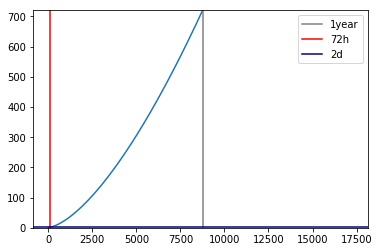

In [158]:
plt.plot(x,sigmoid(x))
plt.axvline(x=24*365,color='gray',label="1year")
plt.axvline(x=72,color='red',label="72h")
plt.axhline(y=2,color='navy',label="2d")
plt.ylim([0,720])
plt.legend()


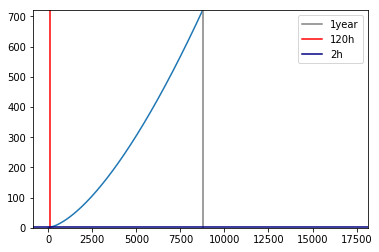

In [159]:
plt.plot(x,sigmoid(x))
plt.axvline(x=24*365,color='gray',label="1year")
plt.axvline(x=120,color='red',label="120h")
plt.axhline(y=2,color='navy',label="2h")
plt.ylim([0,720])
plt.legend()


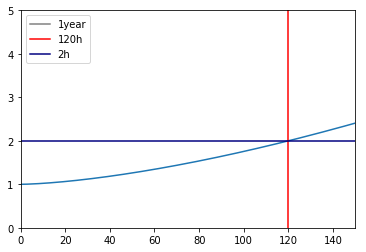

In [160]:
plt.plot(x,sigmoid(x))
plt.axvline(x=24*365,color='gray',label="1year")
plt.axvline(x=120,color='red',label="120h")
plt.axhline(y=2,color='navy',label="2h")
plt.xlim([0,150])
plt.ylim([0,5])
plt.legend()


In [161]:
sigmoid(120)

2.0

In [162]:
for i in range(len(sigmoid(x))):
    if sigmoid(i)>=720:
        print(i)
        break

8760


### int に直す

In [163]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(a):
    u = xx*(a**yy)+1
    condlist = [u < 30*24, u >= 30*24]
    funclist = [lambda u: u, lambda u: 30*24]
    return np.piecewise(u, condlist, funclist)

In [164]:
int_value=[]
for i in range(len(sigmoid(x))):
    ints=int(sigmoid(i))
    int_value.append(ints)     

In [165]:
int_value[115:130]

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

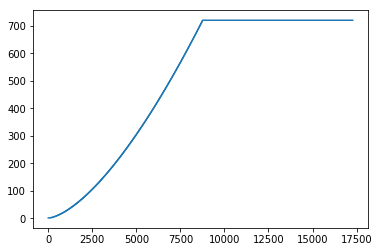

In [166]:
plt.plot(int_value)

(0, 10)

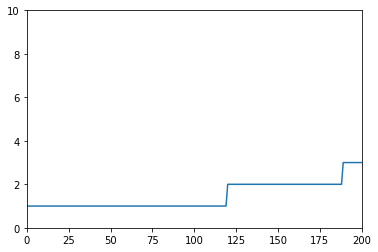

In [167]:
plt.plot(int_value)
plt.xlim([0,200])
plt.ylim([0,10])


In [168]:
int_value_s=pd.DataFrame(int_value)
int_value_s.to_csv("/home/waka/resol_new/resol_5days_2y.csv",header = None,index=None)

### 圧縮

In [169]:
y=[]
t = 0
y.append(int_value[t])
for i in range(len(int_value)):
    t = int_value[t]+t
    y.append(int_value[t])

IndexError: list index out of range

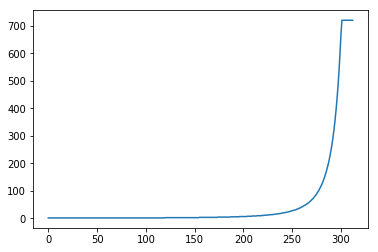

In [170]:
plt.plot(y)

In [173]:
# 2y:17520
np.sum(y[:-1])

16941

In [174]:
y_s = pd.DataFrame(y[:-1])
y_s.to_csv("/home/waka/resol_new/resol_compress_5days_2y.csv",header = None,index=None)

In [178]:
# 1.5y:13140
np.sum(y[:-7])

12621

In [179]:
y_s = pd.DataFrame(y[:-7])
y_s.to_csv("/home/waka/resol_new/resol_compress_5days_1.5y.csv",header = None,index=None)

In [182]:
# 1y:8760
np.sum(y[:-13])

8352

In [183]:
y_s = pd.DataFrame(y[:-13])
y_s.to_csv("/home/waka/resol_new/resol_compress_5days_1y.csv",header = None,index=None)

In [197]:
# 6mon:4380
np.sum(y[:-24])

4173

In [198]:
y_s = pd.DataFrame(y[:-24])
y_s.to_csv("/home/waka/resol_new/resol_compress_5days_6mon.csv",header = None,index=None)

In [199]:
# 3mon:2190
np.sum(y[:-39])

2137

In [200]:
y_s = pd.DataFrame(y[:-39])
y_s.to_csv("/home/waka/resol_new/resol_compress_5days_3mon.csv",header = None,index=None)

In [201]:
# 1mon:720
np.sum(y[:-78])

708

In [202]:
y_s = pd.DataFrame(y[:-78])
y_s.to_csv("/home/waka/resol_new/resol_compress_5days_1mon.csv",header = None,index=None)

In [206]:
# 2we:336
np.sum(y[:-119])

334

In [207]:
y_s = pd.DataFrame(y[:-119])
y_s.to_csv("/home/waka/resol_new/resol_compress_5days_2we.csv",header = None,index=None)

In [210]:
# 1we:168
np.sum(y[:-169])

168

In [211]:
y_s = pd.DataFrame(y[:-169])
y_s.to_csv("/home/waka/resol_new/resol_compress_5days_1we.csv",header = None,index=None)

## 3日間1h

### 分解能、期間数プロット(時間)

In [212]:
from sympy import *
x=Symbol('x')    # 文字'x'を変数xとして定義
y=Symbol('y')    # 文字'x'を変数xとして定義

"""
方程式: solve
連立方程式 x**2+y**2=4, y=2x+1の解を求める
"""
t= solve ([x*(8760**y)-719, x*(72**y)-1],[x,y])  # 連立方程式を解く
print(t)

[(72**(log(719)/(-log(365) + log(3))), -log(719)/(-log(365) + log(3)))]


In [213]:
x1 = np.float(log(719))
x2 = np.float(-log(365))
x3 = np.float(log(3))

y1 = np.float(-log(719))
y2 = np.float(-log(365))
y3 = np.float(log(3))

In [214]:
xx = 72**((x1/(x2+x3)))
yy = y1/(y2+y3)

In [215]:
x = np.arange(0,720*24)

In [216]:
def sigmoid(a):    
    u = xx*(a**yy)+1
    return u

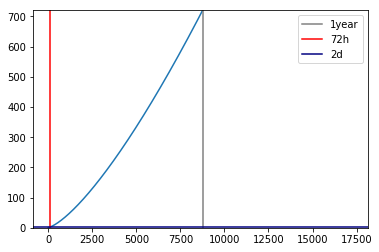

In [217]:
plt.plot(x,sigmoid(x))
plt.axvline(x=24*365,color='gray',label="1year")
plt.axvline(x=72,color='red',label="72h")
plt.axhline(y=2,color='navy',label="2d")
plt.ylim([0,720])
plt.legend()


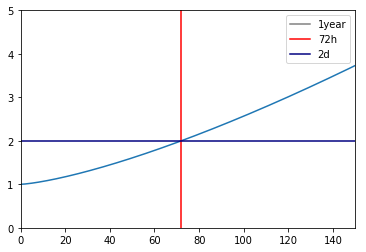

In [218]:
plt.plot(x,sigmoid(x))
plt.axvline(x=24*365,color='gray',label="1year")
plt.axvline(x=72,color='red',label="72h")
plt.axhline(y=2,color='navy',label="2d")
plt.xlim([0,150])
plt.ylim([0,5])
plt.legend()


In [219]:
sigmoid(72)

2.0

In [220]:
for i in range(len(sigmoid(x))):
    if sigmoid(i)>=720:
        print(i)
        break

8760


### int に直す

In [221]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(a):
    u = xx*(a**yy)+1

    condlist = [u < 30*24, u >= 30*24]
    funclist = [lambda u: u, lambda u: 30*24]
    return np.piecewise(u, condlist, funclist)

In [222]:
int_value=[]
for i in range(len(sigmoid(x))):
    ints=int(sigmoid(i))
    int_value.append(ints)     

In [224]:
int_value[67:75]

[1, 1, 1, 1, 1, 2, 2, 2]

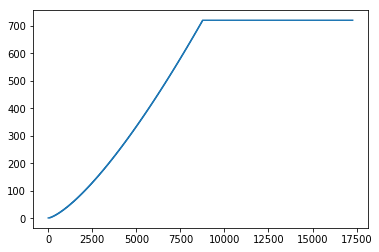

In [225]:
plt.plot(int_value)

(0, 10)

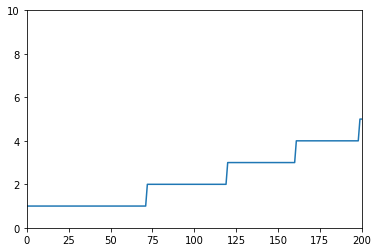

In [226]:
plt.plot(int_value)
plt.xlim([0,200])
plt.ylim([0,10])


In [227]:
int_value_s=pd.DataFrame(int_value)
int_value_s.to_csv("/home/waka/resol_new/resol_3days_2y.csv",header = None,index=None)

### 圧縮

In [228]:
y=[]
t = 0
y.append(int_value[t])
for i in range(len(int_value)):
    t = int_value[t]+t
    y.append(int_value[t])

IndexError: list index out of range

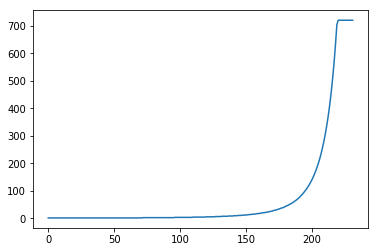

In [229]:
plt.plot(y)

In [230]:
y_s = pd.DataFrame(y)
y_s.to_csv("/home/waka/resol_new/resol_compress_3days_2y.csv",header = None,index=None)

In [231]:
# 2y:17520
np.sum(y[:-1])

17240

In [232]:
y_s = pd.DataFrame(y[:-1])
y_s.to_csv("/home/waka/resol_new/resol_compress_3days_2y.csv",header = None,index=None)

In [235]:
# 1.5y:13140
np.sum(y[:-7])

12920

In [236]:
y_s = pd.DataFrame(y[:-7])
y_s.to_csv("/home/waka/resol_new/resol_compress_3days_1.5y.csv",header = None,index=None)

In [237]:
# 1y:8760
np.sum(y[:-13])

8617

In [238]:
y_s = pd.DataFrame(y[:-13])
y_s.to_csv("/home/waka/resol_new/resol_compress_3days_1y.csv",header = None,index=None)

In [239]:
# 6mon:4380
np.sum(y[:-23])

4345

In [240]:
y_s = pd.DataFrame(y[:-23])
y_s.to_csv("/home/waka/resol_new/resol_compress_3days_6mon.csv",header = None,index=None)

In [245]:
# 3mon:2190
np.sum(y[:-36])

2164

In [247]:
y_s = pd.DataFrame(y[:-36])
y_s.to_csv("/home/waka/resol_new/resol_compress_3days_3mon.csv",header = None,index=None)

In [255]:
# 1mon:720
np.sum(y[:-65])

702

In [257]:
y_s = pd.DataFrame(y[:-65])
y_s.to_csv("/home/waka/resol_new/resol_compress_3days_1mon.csv",header = None,index=None)

In [264]:
# 2we:336
np.sum(y[:-91])

334

In [265]:
y_s = pd.DataFrame(y[:-91])
y_s.to_csv("/home/waka/resol_new/resol_compress_3days_2we.csv",header = None,index=None)

In [271]:
# 1we:168
np.sum(y[:-121])

166

In [272]:
y_s = pd.DataFrame(y[:-121])
y_s.to_csv("/home/waka/resol_new/resol_compress_3days_1we.csv",header = None,index=None)

## 8日間1h

### 分解能、期間数プロット(時間)

In [273]:
from sympy import *
x=Symbol('x')    # 文字'x'を変数xとして定義
y=Symbol('y')    # 文字'x'を変数xとして定義

"""
方程式: solve
連立方程式 x**2+y**2=4, y=2x+1の解を求める
"""
t= solve ([x*(8760**y)-719, x*(192**y)-1],[x,y])  # 連立方程式を解く
print(t)

[(192**(log(719)/(-log(365) + 3*log(2))), -log(719)/(-log(365) + 3*log(2)))]


In [274]:
x1 = np.float(log(719))
x2 = np.float(-log(365))
x3 = np.float(3*log(2))

y1 = np.float(-log(719))
y2 = np.float(-log(365))
y3 = np.float(3*log(2))

In [275]:
xx = 192**((x1/(x2+x3)))
yy = y1/(y2+y3)

In [276]:
x = np.arange(0,720*24)

In [277]:
def sigmoid(a):    
    u = xx*(a**yy)+1
    return u

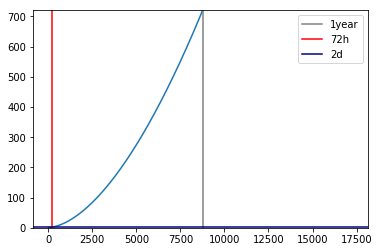

In [278]:
plt.plot(x,sigmoid(x))
plt.axvline(x=24*365,color='gray',label="1year")
plt.axvline(x=192,color='red',label="72h")
plt.axhline(y=2,color='navy',label="2d")
plt.ylim([0,720])
plt.legend()


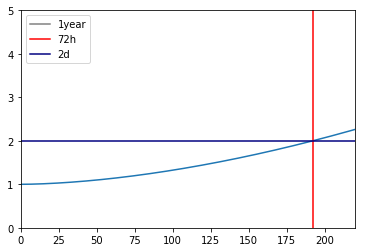

In [279]:
plt.plot(x,sigmoid(x))
plt.axvline(x=24*365,color='gray',label="1year")
plt.axvline(x=192,color='red',label="72h")
plt.axhline(y=2,color='navy',label="2d")
plt.xlim([0,220])
plt.ylim([0,5])
plt.legend()


In [280]:
sigmoid(192)

2.0

In [281]:
for i in range(len(sigmoid(x))):
    if sigmoid(i)>=720:
        print(i)
        break

8760


### int に直す

In [282]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(a):
    u = xx*(a**yy)+1
    condlist = [u < 30*24, u >= 30*24]
    funclist = [lambda u: u, lambda u: 30*24]
    return np.piecewise(u, condlist, funclist)

In [283]:
int_value=[]
for i in range(len(sigmoid(x))):
    ints=int(sigmoid(i))
    int_value.append(ints)     

In [284]:
int_value[115:130]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

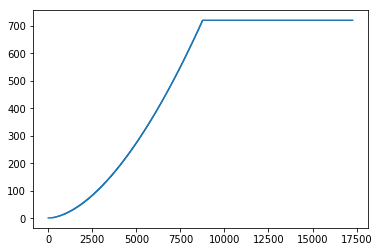

In [285]:
plt.plot(int_value)

(0, 10)

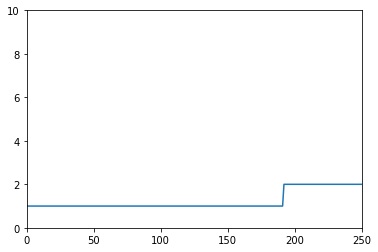

In [288]:
plt.plot(int_value)
plt.xlim([0,250])
plt.ylim([0,10])


In [292]:
int_value_s=pd.DataFrame(int_value)
int_value_s.to_csv("/home/waka/resol_new/resol_8days_2y.csv",header = None,index=None)

### 圧縮

In [293]:
y=[]
t = 0
y.append(int_value[t])
for i in range(len(int_value)):
    t = int_value[t]+t
    y.append(int_value[t])

IndexError: list index out of range

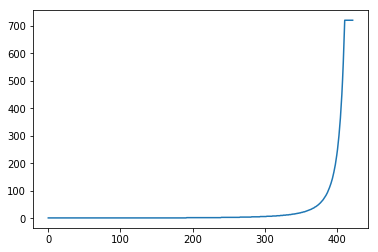

In [294]:
plt.plot(y)

In [113]:
y_s = pd.DataFrame(y)
y_s.to_csv("/home/waka/resol_new/resol_compress_8days_2y.csv",header = None,index=None)

In [296]:
# 2y:17520
np.sum(y)

17462

In [297]:
y_s = pd.DataFrame(y)
y_s.to_csv("/home/waka/resol_new/resol_compress_8days_2y.csv",header = None,index=None)

In [300]:
# 1.5y:13140
np.sum(y[:-7])

12422

In [301]:
y_s = pd.DataFrame(y[:-7])
y_s.to_csv("/home/waka/resol_new/resol_compress_8days_1.5y.csv",header = None,index=None)

In [304]:
# 1y:8760
np.sum(y[:-13])

8182

In [305]:
y_s = pd.DataFrame(y[:-13])
y_s.to_csv("/home/waka/resol_new/resol_compress_8days_1y.csv",header = None,index=None)

In [308]:
# 6mon:4380
np.sum(y[:-24])

4300

In [309]:
y_s = pd.DataFrame(y[:-24])
y_s.to_csv("/home/waka/resol_new/resol_compress_8days_6mon.csv",header = None,index=None)

In [315]:
# 3mon:2190
np.sum(y[:-43])

2137

In [316]:
y_s = pd.DataFrame(y[:-43])
y_s.to_csv("/home/waka/resol_new/resol_compress_8days_3mon.csv",header = None,index=None)

In [323]:
# 1mon:720
np.sum(y[:-99])

713

In [324]:
y_s = pd.DataFrame(y[:-99])
y_s.to_csv("/home/waka/resol_new/resol_compress_8days_1mon.csv",header = None,index=None)

In [332]:
# 2we:336
np.sum(y[:-167])

336

In [333]:
y_s = pd.DataFrame(y[:-167])
y_s.to_csv("/home/waka/resol_new/resol_compress_8days_2we.csv",header = None,index=None)

In [338]:
# 1we:168
np.sum(y[:-255])

168

In [339]:
y_s = pd.DataFrame(y[:-255])
y_s.to_csv("/home/waka/resol_new/resol_compress_8days_1we.csv",header = None,index=None)

In [ ]:
sigmoid(5)
sigmoid(10)


ints=int(sigmoid(x))


a = np.arange(0,720,0.1)
def sigmoid(x):
    
    u = 30 / (1 + e**(-0.02*(x-180)))
    
    return u

plt.plot(a,sigmoid(x))


sigmoid(x)
sigmoid(x).min()
sigmoid(x).max()

plt.plot(a,sigmoid(x))

plt.xlim([0,50])

In [4]:
    
    
os.chdir("/home/owner/waka/shimanto/summary")    
    
import numpy as np
import matplotlib.pyplot as plt
from spectra import Spectra

# 時系列データの作成
# Monthlyデータ30年分(すなわちデータ数は360個)
# 大きな1年(=12ヶ月)周期に加えて緩やかな10年(=120ヶ月)周期、更に各時刻に微小なノイズ
data = pd.read_csv("ave_20082017_24sum_fft.csv",header = None)
data = np.array(data)
N = len(data)
t = np.arange(0, N)
#td = t * np.pi / 6.0
f = data

# 元の時系列の描画
plt.figure(figsize=(20, 6))
plt.plot(t, f)
plt.xlim(0, N)
plt.xlabel('Hour')
plt.show()

# 卓越している周期の描画
spectra = Spectra(t, f, 'Hour')
plt = spectra.draw_with_time()
plt.show()    
















N = len(data)            # サンプル数

freq = np.linspace(0,1,N)

# 信号を生成（周波数10の正弦波+周波数20の正弦波+ランダムノイズ）
f = data

# 高速フーリエ変換
F = np.fft.fft(f)

# 振幅スペクトルを計算
Amp = np.abs(F)

# パワースペクトルの計算（振幅スペクトルの二乗）
Pow = Amp ** 2

# グラフ表示
#plt.figure()
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 17
#plt.subplot(211)
plt.plot(t, f, label='f(n)')
plt.xlabel("Time", fontsize=20)
plt.ylabel("Signal", fontsize=20)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)
plt.xlim([0,8760])
#plt.subplot(212)


plt.plot(freq,Pow, label='|F(k)|')
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

plt.xlim([0,8760])

/home/waka/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
